# Статистический анализ данных

### Цель проекта
Проанализировать данные о некоторых пользователях из нескольких городов, а также об их поездках и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

### Описание данных
**Основные данные:** информация о пользователях, их поездках и подписках.

**Пользователи — users_go.csv**

- user_id - уникальный идентификатор пользователя
- name - имя пользователя
- age -	возраст
- city - город
- subscription_type - тип подписки (free, ultra)

**Поездки — rides_go.csv**

- user_id - уникальный идентификатор пользователя
- distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date - дата совершения поездки

**Подписки — subscriptions_go.csv**

- subscription_type - тип подписки
- minute_price - стоимость одной минуты поездки по данной подписке
- start_ride_price - стоимость начала поездки
- subscription_fee - стоимость ежемесячного платежа

# План проекта
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Распределения
8. Выводы

----------------------

## Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
# чтение данных
try:
    data_rides = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/rides_go.csv')
    data_subscriptions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/subscriptions_go.csv')
    data_users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Yandex/users_go.csv')
except:
    data_rides = pd.read_csv('/datasets/rides_go.csv')
    data_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
    data_users = pd.read_csv('/datasets/users_go.csv')

### Изучение данных о пользователях

In [3]:
data_users.head(20)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
data_users.groupby('user_id')['user_id'].count()

user_id
1       1
2       1
3       1
4       1
5       1
       ..
1530    1
1531    1
1532    1
1533    1
1534    1
Name: user_id, Length: 1534, dtype: int64

### Изучение данных о поездках

In [6]:
data_rides.head(20)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


### Изучение данных о подписках

In [8]:
data_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
data_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


### Выводы
- Изучена информация о пользователях, условиях подписки и поездках за 2021 год;
- В датафрейме data_users сохранена информация о пользователях. Всего 1565 записей;
- В датафрейме data_rides сохранена информация о поездках. Всего 18068 записей;
- В датафрейме data_subscriptions сохранена информация о подписках. Всего 2 записи о условиях подписки;
- Количество записей в users_go.csv больше чем пользователей;
- Формат столбца с датой в данных о поедках указан не верно.

## Предобработка данных

In [10]:
# изменение типа данных в столбце с датой в data_rides
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

In [11]:
# создание столбца с месяцем
data_rides['month'] = data_rides['date'].dt.month

In [12]:
data_rides['date'].dt.year.value_counts()

2021    18068
Name: date, dtype: int64

### Проверка пропусков

In [13]:
# проверка пропусков в data_users
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
# проверка пропусков в data_rides
data_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [15]:
# проверка пропусков в data_subscriptions
data_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

### Поиск дубликатов

In [16]:
# поиск дубликатов в data_users
data_users.duplicated().value_counts()

False    1534
True       31
dtype: int64

In [17]:
data_users[data_users.duplicated()]

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
1536,909,Константин,20,Екатеринбург,free
1537,403,Полина,19,Сочи,ultra
1538,908,Рустам,30,Тюмень,free
1539,43,Стефания,22,Омск,ultra
1540,127,Павел,25,Пятигорск,ultra
1541,659,Злата,27,Ростов-на-Дону,ultra
1542,204,Руслан,30,Пятигорск,ultra
1543,153,Герман,23,Москва,ultra


In [18]:
data_users = data_users.drop_duplicates(keep='first')

In [19]:
# проверка дубликатов в data_users
data_users.duplicated().value_counts()

False    1534
dtype: int64

In [20]:
# поиск дубликатов в data_rides
data_rides.duplicated().value_counts()

False    18068
dtype: int64

### Выводы
- Тип данных в столбце с датой изменен на верный;
- Данные представлены за 2021 год;
- Создан новый столбце с месяцем в data_rides;
- Удалены дубликаты в data_users. Записи появились в конце списка и дублировали данные о пользователях по всему датафрейму. Это могло произойти из-за системной ошибки.

## Исследовательский анализ данных

### Частота встречаемости городов


In [21]:
data_users['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Text(0, 0.5, 'Города')

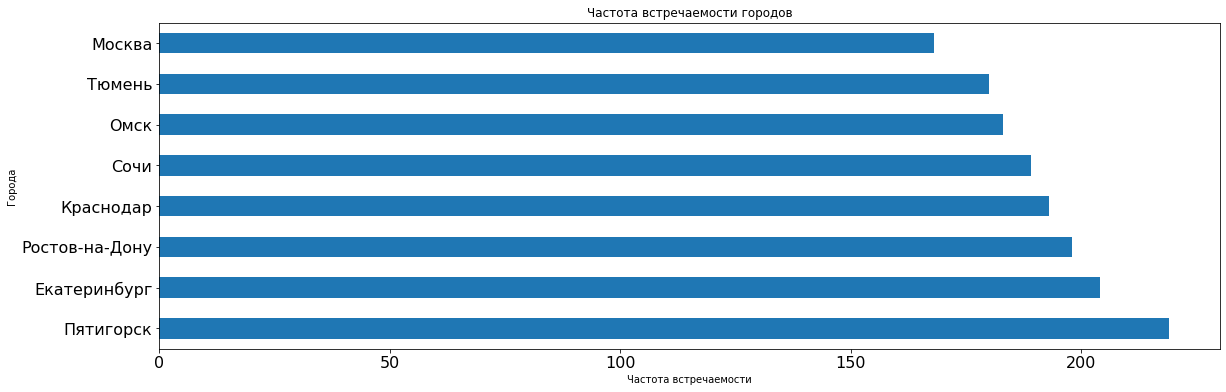

In [22]:
data_users['city'].value_counts().plot(
    title='Частота встречаемости городов',
    kind = 'barh',
    figsize = (19,6),
    legend = False,
    fontsize = 16
)
plt.xlabel('Частота встречаемости')
plt.ylabel('Города')

**Вывод:**
- Большая часть пользователей в Пятигорске и Екатеринбурге
- Меньше всео пользователей из Тюмени и Москвы

### Соотношение пользователей с подпиской и без подписки

In [23]:
data_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

Text(0, 0.5, 'Тип подписки')

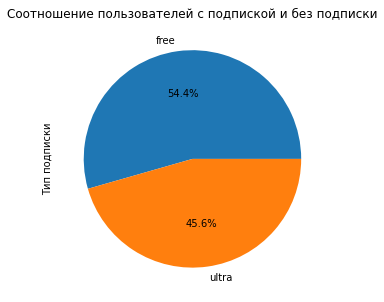

In [24]:
data_users['subscription_type'].value_counts().plot(
    title='Соотношение пользователей с подпиской и без подписки',
    kind='pie',
    autopct='%1.1f%%',
    figsize=(5, 5)
)
plt.ylabel('Тип подписки')

**Вывод:** количество пользователей с подпиской и без подписки почти равны. Однако пользователей, которые пользуются сервисом бесплатно на 4.4% больше.

### Возраст пользователей

In [25]:
data_users.groupby('age')['age'].count()

age
12      4
13      8
14      9
15     13
16     19
17     26
18     46
19     47
20     71
21     93
22    119
23    129
24    132
25    145
26    131
27    119
28    112
29     68
30     68
31     48
32     41
33     39
34     19
35     15
36      6
37      2
38      3
39      1
43      1
Name: age, dtype: int64

Text(0, 0.5, 'Количество пользователей')

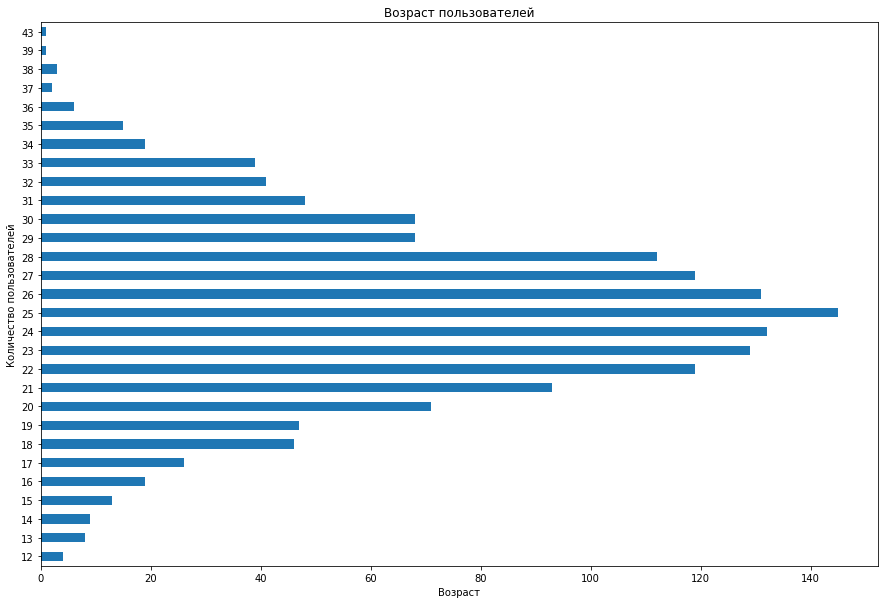

In [26]:
data_users.groupby('age')['age'].count()\
.plot(
    title='Возраст пользователей',
    kind='barh',
    figsize=(15, 10)
)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

In [27]:
data_users['age'].quantile([0.05, 0.95]).describe()

count     2.000000
mean     25.000000
std      11.313708
min      17.000000
25%      21.000000
50%      25.000000
75%      29.000000
max      33.000000
Name: age, dtype: float64

**Вывод:** средний возраст пользователей 25 лет.

### Расстояние, которое пользователь преодолел за одну поездку

In [28]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Text(0, 0.5, 'Количество пользователей')

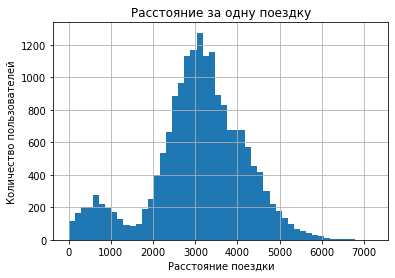

In [29]:
data_rides['distance'].hist(bins=50)
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние поездки')
plt.ylabel('Количество пользователей')

Text(0, 0.5, 'Количество пользователей')

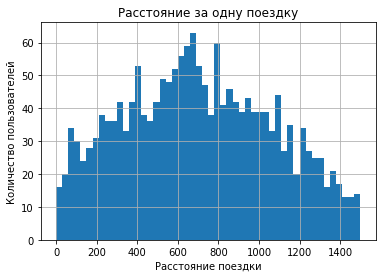

In [30]:
data_rides['distance'].hist(bins=50, range=(0,1500))
plt.title('Расстояние за одну поездку')
plt.xlabel('Расстояние поездки')
plt.ylabel('Количество пользователей')

**Вывод:** график показывает, что в среднем пользователи преодолевают расстояние около 3 км. Однако есть небольшой всплекс на расстоянии около 700 м.

### Продолжительность поездок

Text(0, 0.5, 'Количество пользователей')

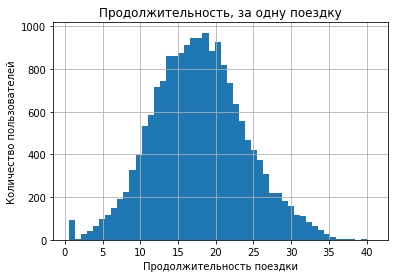

In [34]:
data_rides['duration'].hist(bins=50)
plt.title('Продолжительность, за одну поездку')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество пользователей')

Text(0, 0.5, 'Количество пользователей')

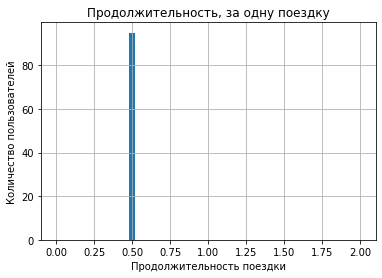

In [35]:
data_rides['duration'].hist(bins=50, range=(0,2))
plt.title('Продолжительность, за одну поездку')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество пользователей')

In [36]:
data_rides.loc[data_rides['duration'] < 2, 'duration'].count()

95

In [37]:
data_rides[data_rides['duration'] < 2].head(20)

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
6860,724,6225.520342,0.5,2021-12-16,12
6883,726,4452.491518,0.5,2021-03-01,3
7018,735,4406.954812,0.5,2021-04-13,4
7160,745,5286.167732,0.5,2021-08-17,8
7364,760,4881.391865,0.5,2021-08-29,8


На графике продолжительнсти поездок присутствует выброс с аномальными значениями. Дистанция и время поездки в строках с выбросами не соответствуют. Для исправления аномальных значений можно найти медианную скорость самокатов и найти предположительное время поездки.

Text(0, 0.5, 'Количество пользователей')

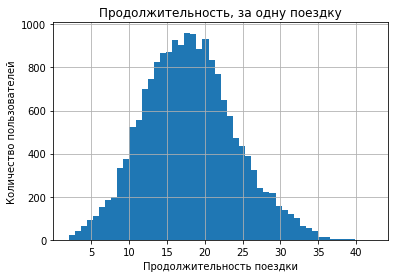

In [38]:
# средняя скорость самокатов
average_speed = (data_rides['distance'] / data_rides['duration']).median()

# исправление аномальных значнеий
data_rides.loc[data_rides['duration'] < 2, 'duration'] = data_rides['distance']/average_speed

# проверка данных
data_rides['duration'].hist(bins=50)
plt.title('Продолжительность, за одну поездку')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество пользователей')

In [39]:
data_rides['duration'].quantile([0.05, 0.95]).describe()

count     2.000000
mean     18.584887
std      14.187286
min       8.552960
25%      13.568924
50%      18.584887
75%      23.600850
max      28.616813
Name: duration, dtype: float64

**Вывод:** среднее время поездки на самокате 18 минут.

### Выводы
- Большая часть пользователей в Пятигорске и Екатеринбурге, меньше всео пользователей из Тюмени и Москвы;
- Пользователей с подпиской - 45.6%, без подписки - 54.4%;
- Средний возраст пользователей - 25 лет;
- В среднем пользователи преодолевают расстояние около 3 км. Однако есть небольшой всплекс на расстоянии около 700 м;
- Среднее время поездки - 18 минут.

## Объединение данных

In [40]:
# создание датафрейма с данными о пользователях, поездках и подписках
data_total = data_users.merge(data_rides, on='user_id')
data_total = data_total.merge(data_subscriptions, on='subscription_type')
data_total['duration'] = np.ceil(data_total['duration'])

In [41]:
# проверка датафрейма
print(data_users.info())
print(data_rides.info())
print(data_subscriptions.info())
print(data_total.info())
data_total.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
None
<cl

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,17.0,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,15.0,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,24.0,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,16.0,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,16.0,2021-11-22,11,6,0,199


In [42]:
# создание датафрейма пользователей с подпиской
data_sub_ultra = data_total[data_total['subscription_type'] == 'ultra']

In [43]:
# создание датафрейма пользователей без подписки
data_sub_free = data_total[data_total['subscription_type'] == 'free']

### Исследование пользователей с подпиской

#### Расстояние за одну поездку

In [44]:
data_sub_ultra['distance'].describe()

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

Text(0, 0.5, 'Количество пользователей')

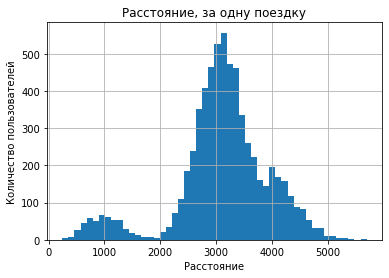

In [45]:
data_sub_ultra['distance'].hist(bins=50)
plt.title('Расстояние, за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')

#### Продолжительность поездок

In [46]:
data_sub_ultra['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

Text(0, 0.5, 'Количество пользователей')

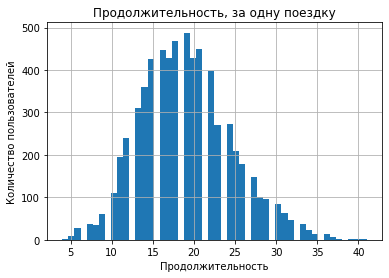

In [47]:
data_sub_ultra['duration'].hist(bins=50)
plt.title('Продолжительность, за одну поездку')
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')

### Исследование пользователей без подписки

#### Расстояние за одну поездку

In [48]:
data_sub_free['distance'].describe()

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

Text(0, 0.5, 'Количество пользователей')

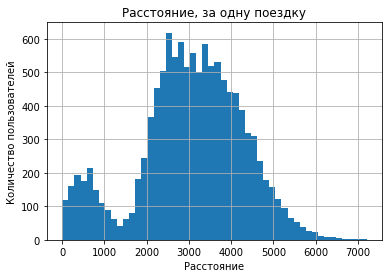

In [49]:
data_sub_free['distance'].hist(bins=50)
plt.title('Расстояние, за одну поездку')
plt.xlabel('Расстояние')
plt.ylabel('Количество пользователей')

#### Продолжительность поездок

In [50]:
data_sub_free['duration'].describe()

count    11568.000000
mean        18.132521
std          6.251327
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         43.000000
Name: duration, dtype: float64

Text(0, 0.5, 'Количество пользователей')

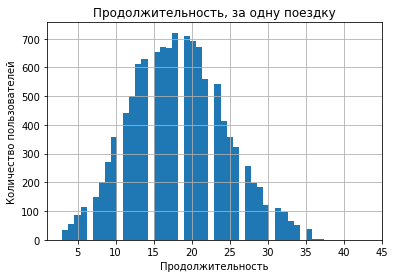

In [51]:
data_sub_free['duration'].hist(bins=50)
plt.title('Продолжительность, за одну поездку')
plt.xlabel('Продолжительность')
plt.ylabel('Количество пользователей')

### Выводы
- Среднее расстояние, которое преодолевают пользователи с подпиской и без подписки равны;
    - Пользователи с подпиской в среднем проезжают от 2785 до 3560;
    - Пользователи без подписки в среднем проезжают от 2384 до 3913.
- Продолжительность поездок пользователей не отличается. В среднем они едут от 13 до 21 минут.

## Подсчёт выручки

### Помесячная выручка от каждого пользователя

In [52]:
data_users_gr = data_total.pivot_table(
    index=['user_id', 'month'],
    values=['distance', 'duration', 'minute_price', 'start_ride_price', 'subscription_fee'],
    aggfunc=({
        'distance': {'count', 'sum'},
        'duration': 'sum',
        'minute_price': 'median',
        'start_ride_price': 'median',
        'subscription_fee': 'median'
    })
)
data_users_gr.columns = [ 'count', 'distance_sum', 'duration_sum', 'minute_price', 'start_ride_price', 'subscription_fee']

In [53]:
# подсчет помесячной выручки от каждого пользователя
data_users_gr['income'] = (data_users_gr['start_ride_price'] * data_users_gr['count']) + \
(data_users_gr['duration_sum'] * data_users_gr['minute_price']) + \
data_users_gr['subscription_fee']

In [54]:
data_users_gr.head(20)

count  distance_sum  duration_sum  minute_price  \
user_id month                                                    
1       1          2   7027.511294          42.0             6   
        4          1    754.159807           7.0             6   
        8          2   6723.470560          46.0             6   
        10         2   5809.911100          32.0             6   
        11         3   7003.499363          56.0             6   
        12         2   6751.629942          28.0             6   
2       3          3  10187.723006          63.0             6   
        4          2   6164.381824          40.0             6   
        6          1   3255.338202          14.0             6   
        7          2   6780.722964          48.0             6   
        8          1    923.007439           7.0             6   
        10         1   2824.636598          19.0             6   
        12         1   3828.248580          12.0             6   
3       1          1   3061.777147          13.0             6   
        2          2   5421.152016          39.0             6   
        4          1   2956.651632          21.0             6   
        5          3   9064.026918          63.0             6   
        7          3  10919.595403          67.0             6   
        9          1   2891.012822          23.0             6   
        12         1   2593.381928          13.0             6   

               start_ride_price  subscription_fee  income  
user_id month                                              
1       1                     0               199   451.0  
        4                     0               199   241.0  
        8                     0               199   475.0  
        10                    0               199   391.0  
        11                    0               199   535.0  
        12                    0               199   367.0  
2       3                     0               199   577.0  
        4                     0               199   439.0  
        6                     0               199   283.0  
        7                     0               199   487.0  
        8                     0               199   241.0  
        10                    0               199   313.0  
        12                    0               199   271.0  
3       1                     0               199   277.0  
        2                     0               199   433.0  
        4                     0               199   325.0  
        5                     0               199   577.0  
        7                     0               199   601.0  
        9                     0               199   337.0  
        12                    0               199   277.0

In [55]:
data_users_gr['income'].describe()

count    11331.000000
mean       344.276145
std        154.725417
min         74.000000
25%        234.000000
50%        319.000000
75%        420.000000
max       1444.000000
Name: income, dtype: float64

<AxesSubplot:>

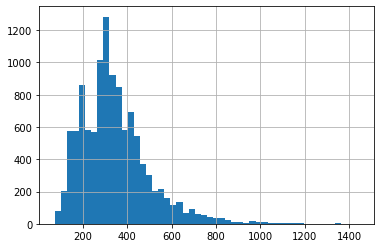

In [56]:
data_users_gr['income'].hist(bins=50)

In [57]:
# выручка за 2021 год
data_users_gr['income'].sum()

3900993.0

### Средняя месячная выручка от пользователей с подпиской

In [58]:
data_users_gr.loc[data_users_gr['subscription_fee'] > 0,'income'].describe()

count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: income, dtype: float64

In [59]:
data_users_gr.loc[data_users_gr['subscription_fee'] > 0,'count'].describe()

count    4533.000000
mean        1.433929
std         0.696331
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: count, dtype: float64

<AxesSubplot:>

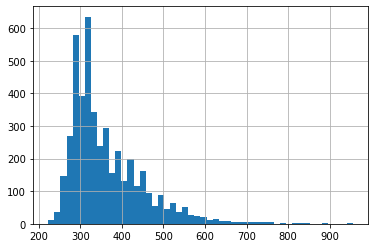

In [60]:
data_users_gr.loc[data_users_gr['subscription_fee'] > 0,'income'].hist(bins=50)

### Средняя месячная выручка от пользователей без подписки

In [61]:
data_users_gr.loc[data_users_gr['subscription_fee'] == 0,'income'].describe()

count    6798.000000
mean      331.929391
std       185.284588
min        74.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: income, dtype: float64

In [62]:
data_users_gr.loc[data_users_gr['subscription_fee'] == 0,'count'].describe()

count    6798.000000
mean        1.701677
std         0.894871
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: count, dtype: float64

<AxesSubplot:>

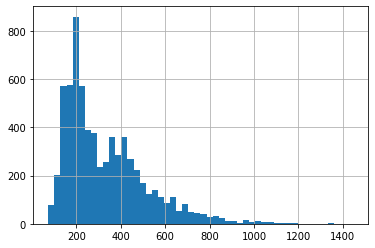

In [63]:
data_users_gr.loc[data_users_gr['subscription_fee'] == 0,'income'].hist(bins=50)

### Выводы
- Выручка за 2021 год 3 865 825 руб.
- Средняя помесячная выручка от каждого пользователя - 319 руб;
    - От пользователей с подпиской - 331 руб;
    - От пользователей без подписки - 274 руб.

## Проверка гипотез

### Гипотеза 1

H0: Пользователи с подпиской и пользователи без подписки тратят равное время на поездки.

H1: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

In [64]:
duration_no_sub = data_total.loc[data_total['subscription_fee'] == 0,'duration']
duration_sub = data_total.loc[data_total['subscription_fee'] > 0,'duration']
print(f'Среднее время без подписки: {duration_no_sub.mean().round(2)}')
print(f'Среднее время с подпиской: {duration_sub.mean().round(2)}')

# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    duration_sub,
    duration_no_sub,
    alternative='greater'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее время без подписки: 18.13
Среднее время с подпиской: 19.04
p-value: 1.646827988200932e-22
Отвергаем нулевую гипотезу


**Выводы:** нулевая гипотеза отвергнута, есть основание утверждать, что пользователи с подпиской в среднем тратят больше времени на поездки, чем пользователи без подписки.

### Гипотеза 2

H0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метрам.

H1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [65]:
distance_sub = data_total.loc[data_total['subscription_fee'] > 0,'distance']
print(f'Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку: {distance_sub.mean().round(2)}')

# среднее расстояние, которое должны проехать пользователи
interested_distance = 3130

# уровень статистической значимости
alpha = 0.05

results = st.ttest_1samp(
    distance_sub,
    interested_distance,
    alternative='greater')

print('p-значение:', results.pvalue.round(2))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку: 3115.45
p-значение: 0.92
Не получилось отвергнуть нулевую гипотезу


**Выводы:** нулевую гипотезу неудалось отвергнуть, есть основание утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает расстояние в 3130 метров.

### Гипотеза 3

H0: Помесячная выручка от пользователей с подпиской и без подписки равны.

H1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [66]:
income_no_sub = data_users_gr.loc[data_users_gr['subscription_fee'] == 0,'income']
income_sub = data_users_gr.loc[data_users_gr['subscription_fee'] > 0,'income']
print(f'Помесячная выручка без подписки: {income_no_sub.mean().round(2)}')
print(f'Помесячная выручка с подпиской: {income_sub.mean().round(2)}')

# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    income_sub,
    income_no_sub,
    alternative='greater'
)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Помесячная выручка без подписки: 331.93
Помесячная выручка с подпиской: 362.79
p-value: 9.391432442479095e-26
Отвергаем нулевую гипотезу


**Выводы:** Нулевая гипотеза отвергнута, есть основание утверждать, что средняя помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

### Гипотеза 4

Количество обращений в техподдержку значимо снизилось после обновления серверов сервиса.

Наборы с данными для каждого пользователя до и после обновления - парные.

Если рассматривается одна и та же генеральные совокупности и количество обращений измерено до и после обновления, тогда можно применить метод scipy.stats.ttest_rel(). Совокупности обязательно должны быть одного размера и согласовываться друг с другом.

### Выводы
- Первая гипотеза не была отвергнула и можно утверждать, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки;
- Вторая гипотеза тоже не была отвергнута и среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- Третья гипотеза также не была отвергнута и можно утверждать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;
- Чтобы проверить снизилось ои количество обращений в техподдержку необходимо применить метод scipy.stats.ttest_rel()
    - Совокупности должны быть одного размера;
    - Совокупности должны согласовываться.

## Общий вывод
1. Проанализировано 3 набора данных:
- информация о пользователях, 1565 записей;
- информация о поездках за 2021 год, 18068 записей;
- информация о подписках, 2 записи.
2. Выполнена предобработка данных:
- Тип данных в столбце с датой изменен на верный;
- Создан новый столбце с месяцем в data_rides;
- Удалены дубликаты в data_users.
3. Выполнен исследовательский анализ данных:
- Услугами сервиса пользуются больше всего в Пятигорске, на второй позиции оказался город Екатеринбург. Меньше пользователей из Тюмени и Москвы;
- Количество пользователей без подписки (54.4%) превышает количество пользователей с подпиской (45.6%) на 4.4%;
- Возраст пользователей от 17 до 33 лет. Средний возраст примерно 25 лет;
- Основная часть пользователей проезжают от 2 до 5 км. В среднем они преодолевают расстояние около 3 км. Однако есть небольшой всплекс на расстоянии около 700 м, который нельзя отбрасывать;
- Визуализация времени поездок пользователей показала, что основная доля поездок длятся от 8 до 28 минут. Среднее поездки - 18 минут;
    - В данных обнаружена аномалия с временем поездки менее 1 минуты. При этом дистанция, которую проехал самокат большая. Время поездки пересчитано с использованием средней скорости самокатов в наборе данных, однако необходимо проверить ошибку, так как она может повлиять на прибыль сервиса.
4. Выполнено объединение данных о пользователях с подпиской и без подписки:
- Среднее расстояние, которое преодолевают пользователи с подпиской и без подписки почти равны;
    - Пользователи с подпиской в среднем проезжают от 2785 до 3560;
    - Пользователи без подписки в среднем проезжают от 2384 до 3913.
- Продолжительность поездок пользователей почти не отличается. В среднем они едут от 13 до 21 минут.
5. Посчитана выручка от пользователей:
- Общая выручка за 2021 год - 3 865 825 руб;
- Средняя помесячная выручка от каждого пользователя - 319 руб;
    - От пользователей с подпиской - 331 руб;
    - От пользователей без подписки - 274 руб.
6. Проверены 4 гипотезы:
- Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки;
- Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров;
- Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки;
- Чтобы проверить снизилось ои количество обращений в техподдержку необходимо применить метод scipy.stats.ttest_rel()
    - Совокупности должны быть одного размера;
    - Совокупности должны согласовываться.